IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import json
import spacy
from spacy import displacy
from collections import Counter

import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


LEITURA DO FICHEIRO DE BASE DE DADOS

In [54]:
#ARMAZENA O CONTEUDO DO FICHEIRO DENTRO DA VARIAVEL 'TWEETS'
file = open("jsonTeste.json", "r")
tweets = file.readlines()
file.close()

EXTRAÇÃO DO TEXTO DOS TWEETS ARMAZENADOS NO JSON

In [3]:
#criação de uma variavel do tipo String vazia que receberá todos os textos dos tweets
text = ""

for t in tweets:
    # se a linha for diferente de uma quebra de linha E se nao possuir a palavra 'limit'
    #(algumas linhas da base de dados apresentam a palavra 'limit', o que causa um erro na leitura)
    if (t != "\n" and (t.__contains__("limit") == False)):
        tweet = json.loads(t)
        # concatenação dos tweets em uma so variavel
        text = tweet["text"] + " " + text

for x in text.lower(): #REMOCAO DOS CARDINAIS DE TODOS OS TWEETS
    if x == "#":
        text = text.replace(x, "")


IDENTIFICAÇÃO DAS ENTIDADES COM NLP (Natural Language Processing) Biblioteca: SpaCy

In [4]:
#utilização o método npl() para carregar os dados em inglês
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

#Representação grafica das entidades com displacy
#displacy.render(doc, style="ent")

CRIAÇÃO DO ARRAY COM TODAS AS ENTIDADES

In [5]:
array_entidades = []
for entidades in doc.ents: #a funcao '.ents' retorna todas as entidades de um texto separadas em uma lista (array)
    # print(entidades, "|", entidades.label_)
    array_entidades.append(entidades.text) #adiciona 'entidades' que é um elemento do array retornado por 'doc.ents'

# print(array_entidades)

FILTRAGREM DAS ENTIDADES

1. Remoção de caracteres indesejados e passa tudo a minúsculo

In [6]:
entidades_lower = []

allowed_chars = set(("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-"))

# CRIA-SE UM NOVO ARRAY DE ENTIDADES SOMENTE COM CARACTERES PERMITIDOS E MINUSCULOS
for palavra in array_entidades:
    conferir = set((palavra))
    # REMOCAO DE EMOJIS e SINAIS
    # retorna True se todos os caracteres forem permitidos
    # issubset = confere se contem SÓ as letras permitidas (retorna true ou false)
    if conferir.issubset(allowed_chars):
        entidades_lower.append(palavra.lower())  # adiciona se for permitido

# print(entidades_lower)

2. Redução do array de entidades com 'set()' para melhorar o desempenho do programa

In [7]:
unica_entidade = set(entidades_lower)  # CONJUNTO -> REMOVE ELEMENTOS REPETIDOS

# print(unica_entidade)

3. Criação dos arrays 'nome_entidade' e 'repeticao_entidade' que receberão o nome da entidade e quantidade de vezes que este nome se repete, respectivamente.
Dessa forma, é possível identificar quais são as entidades que mais se repetem por meio do array 'repeticao_entidade' e, consequentemente, podemos acessar o seu nome (haja vista que nome_entidade[x] corresponde a repeticao_entidade[x]).

In [8]:
nome_entidade = []
repeticao_entidade = []

#ciclos para identificar a quantiade de vezes em que a entidade se repete.
#'compara_entidade' percorre pelo conjunto 'unica_entidade' para comparar palavra por palavra do conjunto.
#'palavra' percorre pelo array 'entidades_lower'. Se 'palavra' for igual a 'compara_entidade' (elemento do conjunto), entao acrescenta 1 ao contador.
for compara_entidade in unica_entidade:
    contador = 0 #o contador reseta sempre que for analisar uma nova palavra do conjunto.
    for palavra in entidades_lower:
        if palavra == compara_entidade:
            contador = contador + 1
    nome_entidade.append(compara_entidade) #adiciona o nome da entidade em um array somente com nomes das entidades.
    repeticao_entidade.append(contador) #adiciona a quantidade de vezes em que a entidade se repete em um array somente com a quantidade de repetição .
    #O nome e a quantidade serao armazenados em arrays diferentes, porem, no mesmo indice em ambos os arrays.

for x in range(len(nome_entidade)):  # ou len(repeticao_entidade) (o tamanho dos arrays será sempre o mesmo).
    # Demonstração do armazenamento dos arrays
    print("Entidade: %s   [Repeticoes: %5d]" % (nome_entidade[x].ljust(35, '.'), repeticao_entidade[x]))


Entidade: mist...............................   [Repeticoes:     1]
Entidade: 46.................................   [Repeticoes:     2]
Entidade: pepsi..............................   [Repeticoes:     2]
Entidade: pakistani..........................   [Repeticoes:     1]
Entidade: meade..............................   [Repeticoes:     1]
Entidade: allezallezallez....................   [Repeticoes:     3]
Entidade: championsxfox......................   [Repeticoes:     1]
Entidade: dope...............................   [Repeticoes:     1]
Entidade: 163................................   [Repeticoes:     1]
Entidade: panem..............................   [Repeticoes:     1]
Entidade: ruttosporc.........................   [Repeticoes:     1]
Entidade: 2..................................   [Repeticoes:    15]
Entidade: robertson..........................   [Repeticoes:     4]
Entidade: leggo..............................   [Repeticoes:     1]
Entidade: pra................................   

4. Ordenação do array de entidades (Ordenação: Entidade que se repete mais para a entidade que se repete menos). Método: BUBBLE SORT.

In [9]:
# IMPLEMENTACAO DO METODO BUBBLE SORT
# Com este método, é possível ordenar o array 'repeticao_entidade' e, junto com este array, o array 'nome_entidade' também se ordena

# inicia na ultima posicao (tamanho do array) e decresce um valor (-1) ate chegar em 0
for final in range(len(repeticao_entidade), 0, -1):
    for atual in range(0, final-1):
        # < indica que ordena na ordem decrescente
        if repeticao_entidade[atual] < repeticao_entidade[atual + 1]:
            repeticao_entidade[atual], repeticao_entidade[atual + 1] = repeticao_entidade[atual + 1], repeticao_entidade[atual]
            nome_entidade[atual], nome_entidade[atual + 1] = nome_entidade[atual + 1], nome_entidade[atual]

# Ao fazer o print dos arrays novamente (como no bloco acima), é possivel ver que as entidades estão ordenadas de acordo com a qnt de repetição
for x in range(len(nome_entidade)):  # ou len(repeticao_entidade) (o tamanho dos arrays será sempre o mesmo).
    #Demonstração do armazenamento dos arrays
    print("Entidade: %s   [Repeticoes: %5d]" % (nome_entidade[x].ljust(35, '.'), repeticao_entidade[x]))


Entidade: uclfinal...........................   [Repeticoes:  1929]
Entidade: liverpool..........................   [Repeticoes:   408]
Entidade: kiev...............................   [Repeticoes:   291]
Entidade: halamadrid.........................   [Repeticoes:   143]
Entidade: madrid.............................   [Repeticoes:   133]
Entidade: tonight............................   [Repeticoes:    86]
Entidade: anfield............................   [Repeticoes:    69]
Entidade: ronaldo............................   [Repeticoes:    60]
Entidade: salah..............................   [Repeticoes:    54]
Entidade: realmadrid.........................   [Repeticoes:    44]
Entidade: reds...............................   [Repeticoes:    42]
Entidade: one................................   [Repeticoes:    39]
Entidade: rma................................   [Repeticoes:    33]
Entidade: gigantescos........................   [Repeticoes:    32]
Entidade: un.................................   

5. Identificação das 10 entidades mais relevantes dos arrays lidos.

In [10]:
cnt_entidades_repetidas = 0

for x in range(len(nome_entidade)):
    # print("TOP ", x+1, " = ", "Nome:", nome_entidade[x], "  |  Repeticao: ", repeticao_entidade[x])
    print("TOP %2i: %s   [Repeticoes: %5d]" % (x+1, nome_entidade[x].ljust(35, '.'), repeticao_entidade[x]))
    cnt_entidades_repetidas += 1
    if (cnt_entidades_repetidas == 10):
        break

TOP  1: uclfinal...........................   [Repeticoes:  1929]
TOP  2: liverpool..........................   [Repeticoes:   408]
TOP  3: kiev...............................   [Repeticoes:   291]
TOP  4: halamadrid.........................   [Repeticoes:   143]
TOP  5: madrid.............................   [Repeticoes:   133]
TOP  6: tonight............................   [Repeticoes:    86]
TOP  7: anfield............................   [Repeticoes:    69]
TOP  8: ronaldo............................   [Repeticoes:    60]
TOP  9: salah..............................   [Repeticoes:    54]
TOP 10: realmadrid.........................   [Repeticoes:    44]


ARMAZENANDO AS 10 ENTIDADES MAIS RELEVANTES EM UM ARRAY

In [11]:
top_entidades = [] #lista com as entidades mais relevantes em ordem decrescente

cnt = 0
for x in nome_entidade:
    if (cnt == 10):
        break
    top_entidades.append(x)
    cnt += 1

print(top_entidades)

['uclfinal', 'liverpool', 'kiev', 'halamadrid', 'madrid', 'tonight', 'anfield', 'ronaldo', 'salah', 'realmadrid']


IDENTIFICANDO TWEETS RELACIONADOS A CADA ENTIDADE

In [12]:
top_tweets = 10 * [""]

for t in tweets:
    # se a linha for diferente de uma quebra de linha E se nao possuir a palavra 'limit'
    # (algumas linhas da base de dados apresentam a palavra 'limit', o que causa um erro na leitura)
    if ((t.__contains__("limit") == False)):
        for index in range(10):
            if (t.lower().__contains__(top_entidades[index])):
                tweet = json.loads(t)
                # concatenação dos tweets em uma so variavel
                top_tweets[index] = tweet["text"] + " " + top_tweets[index]

# EXEMPLO:
#print(top_tweets[9])

INÍCIO DA POLARIZAÇÃO DOS DADOS RECOLHIDOS (ANÁLISE DE SENTIMENTOS / POPULARIDADE EMOTIVA)

TOKENIZAÇÃO DOS TEXTOS COM NLTK E PASSANDO TODO O TEXTO PARA LETRAS MINÚSCULAS

In [13]:
tokens_tweets = 10 * [""]

for x in range(10):
    tokens_tweets[x] = nltk.word_tokenize(top_tweets[x].lower())

# print(tokens_tweets[0])

REMOVENDO STOP WORDS (palavras irrelevantes para a alise de sentimentos)

In [65]:
stop_words = set(stopwords.words('english'))

tokens_tweets_clean = 10 * [""]

for x in range(10):
    tokens_tweets_clean[x] = [word for word in tokens_tweets[x] if word not in stop_words]


print("\nQuantidade de tokens dos tweets da primeira entidade sem a remocao das Stop Words: %i" % (len(tokens_tweets[0])))
print("\nQuantidade de tokens dos tweets da primeira entidade com a remocao das Stop Words: %i" % (len(tokens_tweets_clean[0])))



Quantidade de tokens dos tweets da primeira entidade sem a remocao das Stop Words: 77299

Quantidade de tokens dos tweets da primeira entidade com a remocao das Stop Words: 68563


LEMATIZAÇÃO COM SENTIWORDNET
(processo de deflexionar uma palavra para determinar o seu lema)

In [15]:
lemmatizador = WordNetLemmatizer()

#EXEMPLOS:

# print(lemmatizador.lemmatize("dogs"))
# print(lemmatizador.lemmatize("cats"))
# print(lemmatizador.lemmatize("loves"))
# print(lemmatizador.lemmatize("wants"))

In [16]:
tokens_lematizados = 10 * [""]

for x in range(10):
    tokens_lematizados[x] = [lemmatizador.lemmatize(word) for word in tokens_tweets_clean[x]]


POS TAGGING (Etiquetar cada token com a sua classificação gramatical) UTILIZANDO NLTK

In [17]:
tokens_tag = 10 * [""]

for x in range(10):
    tokens_tag[x] = nltk.pos_tag(tokens_lematizados[x])

#EXEMPLO DAS TAGS
# print(tokens_tag[0])

#VARIÁVEIS PARA RECEBER A PONTUACAO DE POLARIDADE DE CADA INDICE DA LISTA
pos = 10 * [0]
neg = 10 * [0]
obj = 10 * [0]
count = 10 * [0]

IDENTIFICAÇÃO DOS VERBOS QUE SE REPETIRAM MAIS EM CADA INDICE DA LISTA DE TWEETS

In [18]:
allowed_chars = set(("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-"))

verbos_entidades = 10 * [""]

for x in range(10):
    verbos = []
    for (palavra, tag) in tokens_tag[x]:
        if (tag == "VB" and set(palavra).issubset(allowed_chars)): #adiciona apenas se o token tiver a tag 'VB' e nao conter emoji/sinais
            verbos.append(palavra)
    verbos_entidades[x] = verbos

# print(top_verbos[0])

conjunto_verbo = 10 * [0]

for x in range(10):
    conjunto_verbo[x] = set(verbos_entidades[x])

top_verbos = [], [], [], [], [], [], [], [], [], []

for x in range(10):
    for compara_verbo in conjunto_verbo[x]:
        contador = 0
        for verbo in verbos_entidades[x]:
            if (verbo == compara_verbo):
                contador = contador + 1
        top_verbos[x].append((contador, compara_verbo))
        

for index in range(10):
    top_verbos[index].sort(reverse=True) #organizacao decrescente

for index in range(10):
    contador_verbos = 0
    print("\n10 Verbos mais presentes da entidade ->", top_entidades[index])
    for (x, y) in top_verbos[index]:
        if(contador_verbos == 10):
            break
        print("Verbo: %s   [Repeticoes: %5d]" % (y.ljust(35, '.'), x))
        contador_verbos += 1


10 Verbos mais presentes da entidade -> uclfinal
Verbo: go.................................   [Repeticoes:   101]
Verbo: let................................   [Repeticoes:    50]
Verbo: rt.................................   [Repeticoes:    37]
Verbo: come...............................   [Repeticoes:    37]
Verbo: walk...............................   [Repeticoes:    26]
Verbo: win................................   [Repeticoes:    23]
Verbo: get................................   [Repeticoes:    21]
Verbo: make...............................   [Repeticoes:    13]
Verbo: give...............................   [Repeticoes:    11]
Verbo: begin..............................   [Repeticoes:    11]

10 Verbos mais presentes da entidade -> liverpool
Verbo: go.................................   [Repeticoes:    43]
Verbo: come...............................   [Repeticoes:    21]
Verbo: rt.................................   [Repeticoes:    19]
Verbo: let................................   [Repetico

FUNÇÕES PARA O SCORING DE SENTIMENTOS

Conversão entre Tags do Penn Treebank para as Tags simples do wordnet

In [19]:
def penn_para_wn(tag):
    if tag.startswith("J"):
        return wn.ADJ
    elif tag.startswith("N"):
        return wn.NOUN
    elif tag.startswith("R"):
        return wn.ADV
    elif tag.startswith("V"):
        return wn.VERB
    return None

In [20]:
def obter_sentimento(word, tag):
    wn_tag = penn_para_wn(tag)
    # print("Tag Penn Treebank: ", tag)
    # print("Tag Wordnet:", wn_tag)
    
    # SYNSET: grupos de sinonimos que expressam o mesmo significado
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # PEGAR O PRIMEIRO SENTIDO
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    return [synset.name(), swn_synset.pos_score(), swn_synset.neg_score(), swn_synset.obj_score()]

UTILIZAÇÃO DAS FUNÇÕES PARA A OBTENÇÃO DOS SYNSETS COM SUAS RESPECTIVAS PONTUAÇÕES (pos, neg e obj)

In [67]:
senti_val = 10 * [0]
for x in range(10):
    senti_val[x] = [obter_sentimento(x, y) for (x, y) in tokens_tag[x]]
print(len(senti_val[7]))

2760


CÁLCULO DA MÉDIA DA PONTUAÇÃO DE CADA ENTIDADE

In [79]:
qntd = 10 * [0]
for x in range(10):
    for i in range(len(senti_val[x])):        
        try:
            if (senti_val[x][i][3] != 1): #Exclusao das palavras em que o OBJ seja == 1 (Palavras com sentimentos neutros)
                pos[x] = pos[x] + senti_val[x][i][1]
                neg[x] = neg[x] + senti_val[x][i][2]
                obj[x] = obj[x] + senti_val[x][i][3]
                qntd[x] = qntd[x] + 1
                # print para analise dos dados
                # print(senti_val[x][i]) 
        except:
            continue
total_pontuacao = 10 * [0]
for x in range(10):
    pos[x] = pos[x] / qntd[x] #MÉDIA: Soma de todos os numeros positivos dividido pela quantidade de numeros somados
    neg[x] = neg[x] / qntd[x] 
    total_pontuacao[x] = pos[x] - neg[x] #valores positivos - valores positivos

print("     ENTIDADE             POSITIVO            NEGATIVO            TOTAL:")
for x in range(10):
    print("%2dº  %s %f            %f            %f" % (x+1, top_entidades[x].ljust(20, " "), pos[x], neg[x], total_pontuacao[x]))

     ENTIDADE             POSITIVO            NEGATIVO            TOTAL:
 1º  uclfinal             0.245040            0.130607            0.114434
 2º  liverpool            0.262806            0.122133            0.140673
 3º  kiev                 0.250000            0.156818            0.093182
 4º  halamadrid           0.201220            0.105183            0.096037
 5º  madrid               0.225415            0.136256            0.089159
 6º  tonight              0.243873            0.111520            0.132353
 7º  anfield              0.467975            0.054752            0.413223
 8º  ronaldo              0.255952            0.121032            0.134921
 9º  salah                0.200431            0.136853            0.063578
10º  realmadrid           0.257000            0.129000            0.128000


CRIAÇÃO DO GRÁFICO PARA A REPRESENTAÇÃO DAS 10 ENTIDADES MAIS COMENTADAS E SUAS RESPECTIVAS POLARIDADES (ENTRE -1 E 1)

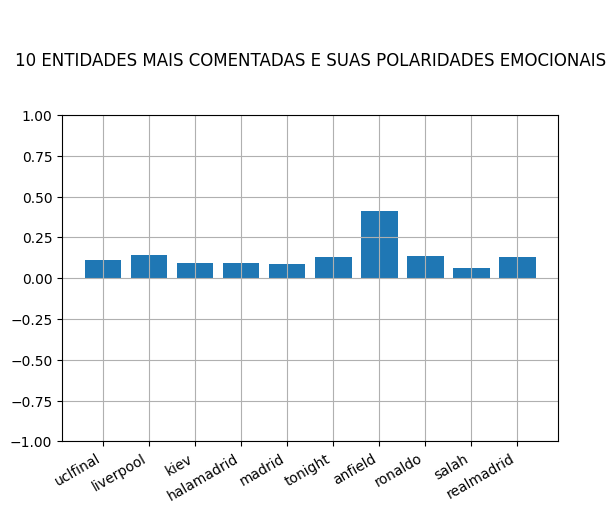

In [40]:
fig, ax1 = plt.subplots()
ax1.bar(top_entidades, total_pontuacao)
ax1.set_title("\n\n10 ENTIDADES MAIS COMENTADAS E SUAS POLARIDADES EMOCIONAIS\n\n")
plt.ylim(-1, 1)
plt.grid(True)
fig.autofmt_xdate()

MENU DE INTERAÇÃO COM O UTILIZADOR

In [ ]:
tweets_entrada = ""
tweets_tokens = ""
tweets_limpos = ""
tweets_lematizados = ""
tweets_tags = ""
tweets_pontuacao = ""
qntd_entrada = 0
obj_entrada = 0
neg_entrada = 0
pos_entrada = 0

entrada = str(input("Digite uma entidade para saber sua polaridade/classificacao emotiva ou digite 0 para sair: "))

if(entrada.lower() in unica_entidade):
    #LEITURA DOS TWEETS DESTA ENTIDADE
    for t in tweets:
        if ((t.__contains__("limit") == False)):
            if (t.lower().__contains__(entrada.lower())):
                tweet = json.loads(t)
                # concatenação dos tweets em uma so variavel
                tweets_entrada = tweet["text"] + " " + tweets_entrada

    #TOKENIZACAO
    tweets_tokens = nltk.word_tokenize(tweets_entrada.lower())
            
    #REMOCAO DAS STOPWORDS
    tweets_limpos = [word for word in tweets_tokens if word not in stop_words]

    #LEMATIZACAO
    tweets_lematizados = [lemmatizador.lemmatize(word) for word in tweets_limpos]
    
    #TAGGING
    tweets_tags = nltk.pos_tag(tweets_lematizados)

    #OBTENCAO DA PONTUACAO DE CADA TOKEN
    tweets_pontuacao = [obter_sentimento(x, y) for (x, y) in tweets_tags]

    #SOMA DOS POSITIVOS E NEGATIVOS
    for i in range(len(tweets_pontuacao)):
        try:
            # Exclusao das palavras em que o OBJ seja == 1 (Palavras com sentimentos neutros)
            if (tweets_pontuacao[i][3] != 1):
                pos_entrada = pos_entrada + tweets_pontuacao[i][1]
                neg_entrada = neg_entrada + tweets_pontuacao[i][2]
                obj_entrada = obj_entrada + tweets_pontuacao[i][3]
                qntd_entrada = qntd_entrada + 1
        except:
            continue

    pos_entrada = pos_entrada / qntd_entrada
    neg_entrada = neg_entrada / qntd_entrada
    total_entrada = pos_entrada - neg_entrada

    valores_grafico = [pos_entrada, neg_entrada, total_entrada]
    nomes_grafico = ["POSITIVO", "NEGATIVO", "TOTAL"]

    fig, ax1 = plt.subplots()
    ax1.bar(nomes_grafico, valores_grafico)
    ax1.set_title("POLARIZACAO EMOTIVA DA ENTIDADE " + entrada.upper())
    plt.ylim(-1, 1)
    plt.grid(True)

else:
    print("A entidade", entrada, "nao existe no conjunto de Tweets!\n")
